# 22-Goals Scored vs Conceded Timeline

Trying to plot histograms to show when teams have scored and conceded goals in timeframes during a match

### Data Collection and Preprocessing

In [146]:
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from highlight_text import ax_text, fig_text
from PIL import Image
import urllib
import os
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np


In [13]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')
#get only the shotsData
strings = scripts[1].string
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
result = []
team = []
minute = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])
            
col_names = ['result','team','minute']
df = pd.DataFrame([result,team,minute],index=col_names)
df = df.T
df = df.sort_values("minute")
df = df[df["result"]== "Goal"]


Please enter the match id:  18202


In [14]:
df

,result,team,minute
15,Goal,Arsenal,19


#### Data is ready
#### Now to create a fucntion and then create a combined dataframe

In [52]:
def match(id):
    
    #scrape a single game shots. We will allow users to enter a base url
    base_url = 'https://understat.com/match/'
    match = str(id)
    url = base_url+match
    #Use requests to get the webpage and BeautifulSoup to parse the page
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'lxml')
    scripts = soup.find_all('script')
    #get only the shotsData
    strings = scripts[1].string
    # strip unnecessary symbols and get only JSON data 
    ind_start = strings.index("('")+2 
    ind_end = strings.index("')") 
    json_data = strings[ind_start:ind_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')

    #convert string to json format
    data = json.loads(json_data)
    result = []
    team = []
    minute = []
    data_away = data['a']
    data_home = data['h']
    for index in range(len(data_home)):
        for key in data_home[index]:
            if key == 'h_team':
                team.append(data_home[index][key])
            if key == 'result':
                result.append(data_home[index][key])
            if key == 'minute':
                minute.append(data_home[index][key])

    for index in range(len(data_away)):
        for key in data_away[index]:
            if key == 'a_team':
                team.append(data_away[index][key])
            if key == 'result':
                result.append(data_away[index][key])
            if key == 'minute':
                minute.append(data_away[index][key])
            


    col_names = ['result','team','minute']
    df = pd.DataFrame([result,team,minute],index=col_names)
    df = df.T
    df = df.sort_values("minute")
    df = df[ (df["result"]== "Goal") | (df["result"]== "OwnGoal") ]
    return df


In [75]:
df1 =match(18202)


#### Optimising code

In [76]:
list1 = [18217,18227,18238,18247,18261,18280,18282]
# create an Empty DataFrame object
df1
  

,result,team,minute
15,Goal,Arsenal,19
10,OwnGoal,Crystal Palace,84


In [77]:
for x in list1:
    df2 = match(x)
    print(df2)
    df1 = pd.concat([df1,df2],sort=True)

     result       team minute
4      Goal    Arsenal     22
7      Goal    Arsenal     34
10  OwnGoal    Arsenal     52
11     Goal    Arsenal     54
23     Goal  Leicester     73
14     Goal    Arsenal     74
   result     team minute
8    Goal  Arsenal     10
7    Goal  Arsenal      4
14   Goal  Arsenal     53
   result     team minute
28   Goal   Fulham     55
12   Goal  Arsenal     63
21   Goal  Arsenal     85
   result         team minute
10   Goal      Arsenal     29
25   Goal  Aston Villa     73
19   Goal      Arsenal     76
   result               team minute
3    Goal  Manchester United     34
20   Goal            Arsenal     59
5    Goal  Manchester United     65
8    Goal  Manchester United     74
   result     team minute
6    Goal  Arsenal     16
7    Goal  Arsenal     27
13   Goal  Arsenal     48
   result       team minute
5    Goal    Arsenal     19
24   Goal  Tottenham     30
12   Goal    Arsenal     48
17   Goal    Arsenal     66


## We got our desired data, now to sort them based on minutes and goals scored and conceded

In [78]:
df1['minute'] = df1['minute'].astype('float')

In [79]:
df1 =df1.sort_values("minute")

In [80]:
df1

,minute,result,team
7,4.0,Goal,Arsenal
8,10.0,Goal,Arsenal
6,16.0,Goal,Arsenal
5,19.0,Goal,Arsenal
15,19.0,Goal,Arsenal
4,22.0,Goal,Arsenal
7,27.0,Goal,Arsenal
10,29.0,Goal,Arsenal
24,30.0,Goal,Tottenham
7,34.0,Goal,Arsenal


In [82]:
goals_scored = df1[ ((df1["team"] == "Arsenal") & (df1["result"] == "Goal")) | ((df1["team"] != "Arsenal") & (df1["result"] == "OwnGoal"))]
goals_conceded = df1[ ((df1["team"] != "Arsenal") & (df1["result"] == "Goal")) | ((df1["team"] == "Arsenal") & (df1["result"] == "OwnGoal"))]

In [83]:
goals_scored

,minute,result,team
7,4.0,Goal,Arsenal
8,10.0,Goal,Arsenal
6,16.0,Goal,Arsenal
5,19.0,Goal,Arsenal
15,19.0,Goal,Arsenal
4,22.0,Goal,Arsenal
7,27.0,Goal,Arsenal
10,29.0,Goal,Arsenal
7,34.0,Goal,Arsenal
13,48.0,Goal,Arsenal


In [84]:
len(goals_scored)

20

In [85]:
goals_conceded

,minute,result,team
24,30.0,Goal,Tottenham
3,34.0,Goal,Manchester United
10,52.0,OwnGoal,Arsenal
28,55.0,Goal,Fulham
5,65.0,Goal,Manchester United
25,73.0,Goal,Aston Villa
23,73.0,Goal,Leicester
8,74.0,Goal,Manchester United


In [86]:
len(goals_conceded)

8

## Data is perfect

#### Plotting

In [114]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


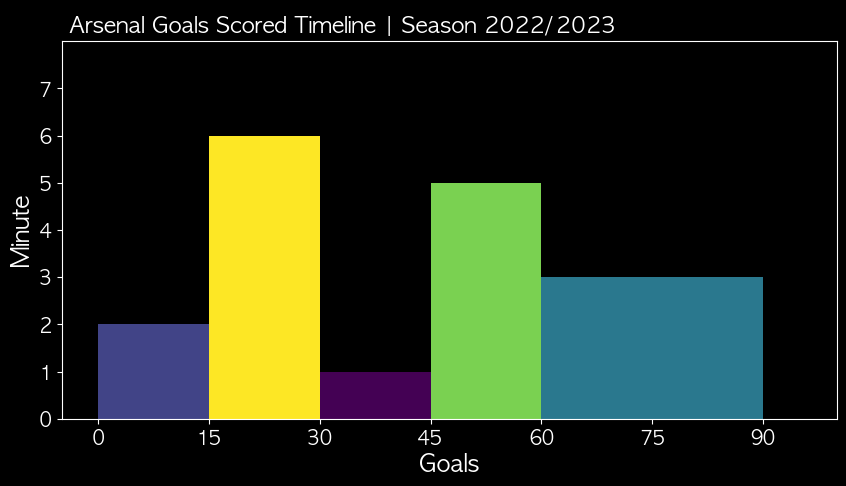

In [137]:
fig = plt.figure(figsize=(10,5), dpi=100)
ax = plt.subplot()

fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')




# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')
ax.spines["right"].set_color('white')   #spines removes the plot edges(border)
ax.spines["top"].set_color('white')


plt.ylim(0,8)
plt.xlim(-5,100)
ax.yaxis.set_ticks([y for y in range(0,8,1)])
ax.xaxis.set_ticks([x for x in range(0,105,15)])

plt.xlabel("Goals",font ='AppleGothic',fontsize = 17,color="white")
plt.ylabel("Minute",font ='AppleGothic',fontsize = 17,color= "white")
ax.tick_params(labelsize=14)

fig_text(
	x = 0.68, y = .89, 
    s = "Arsenal Goals Scored Timeline | Season 2022/2023",
	va = "bottom", ha = "right",
	 color = "white", font = "AppleGothic",size =16
)


plt.yticks(fontname = "AppleGothic")
plt.xticks(fontname = "AppleGothic")





# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(goals_scored["minute"],bins= [0, 15,30,45,60,75, 90],color="red")

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)


In [ ]:
team_map = {
    'team': ['Arsenal'
    ],
    'fotmob_id':[
        9825]}

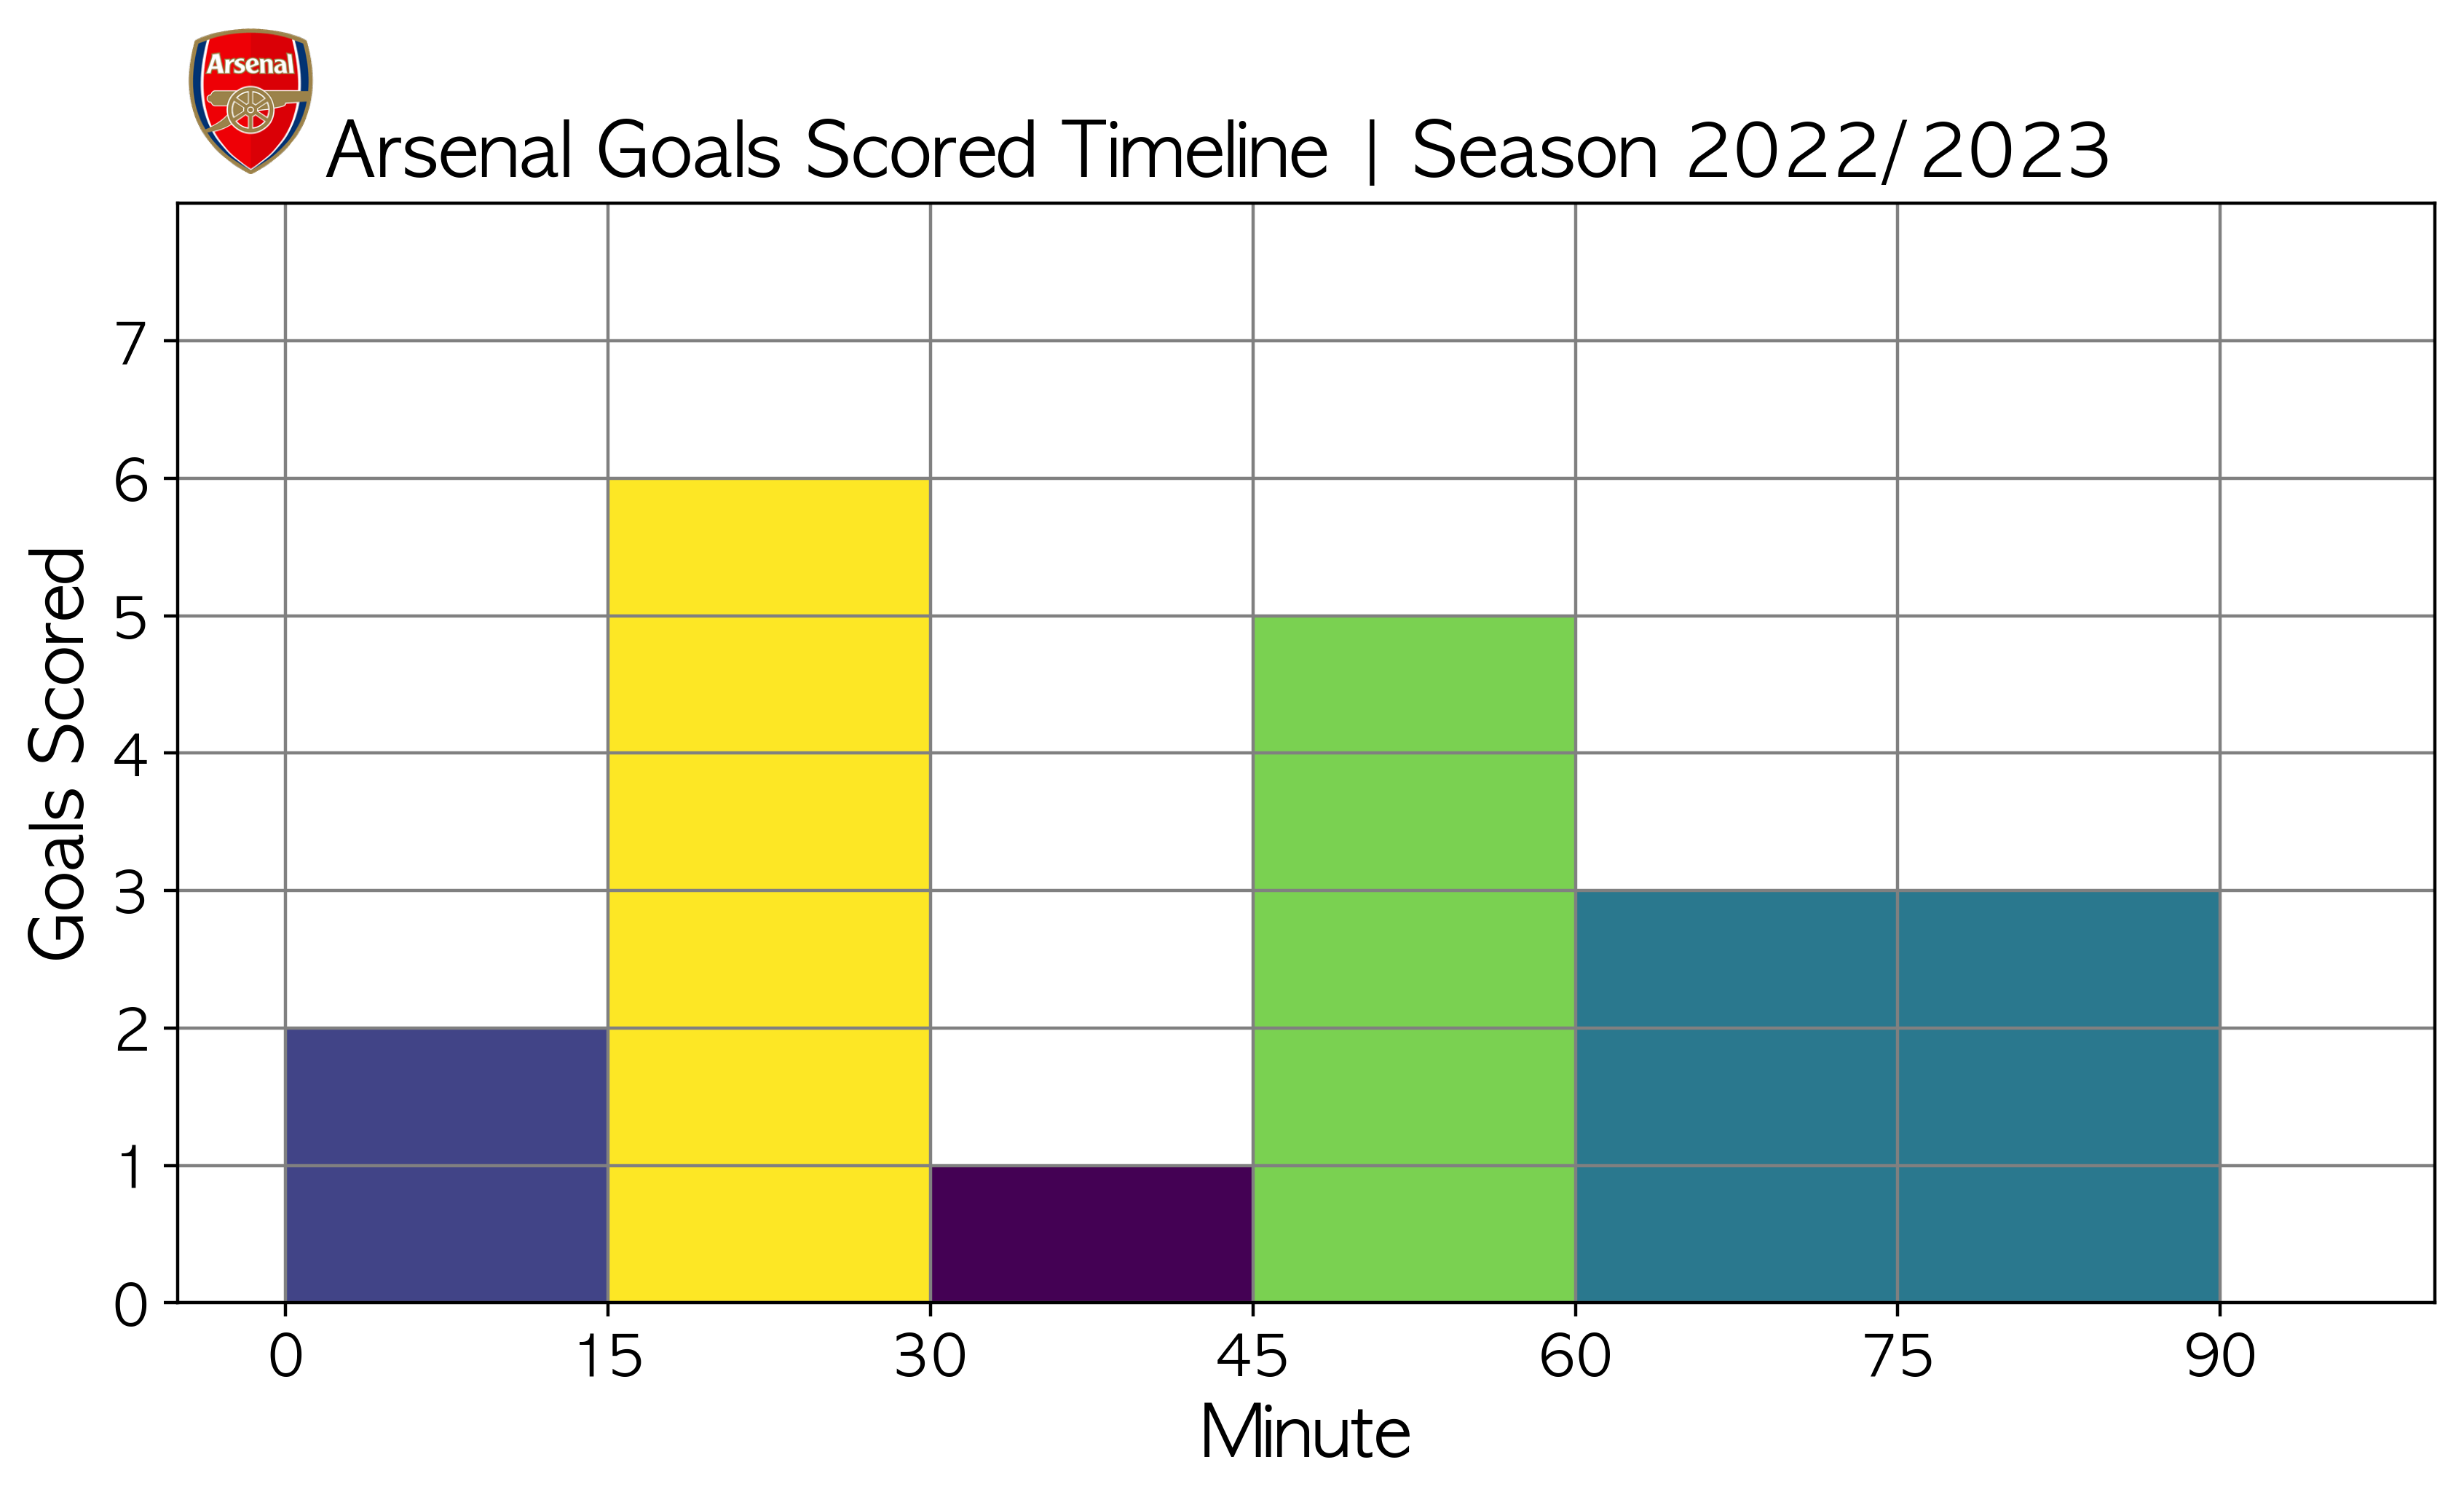

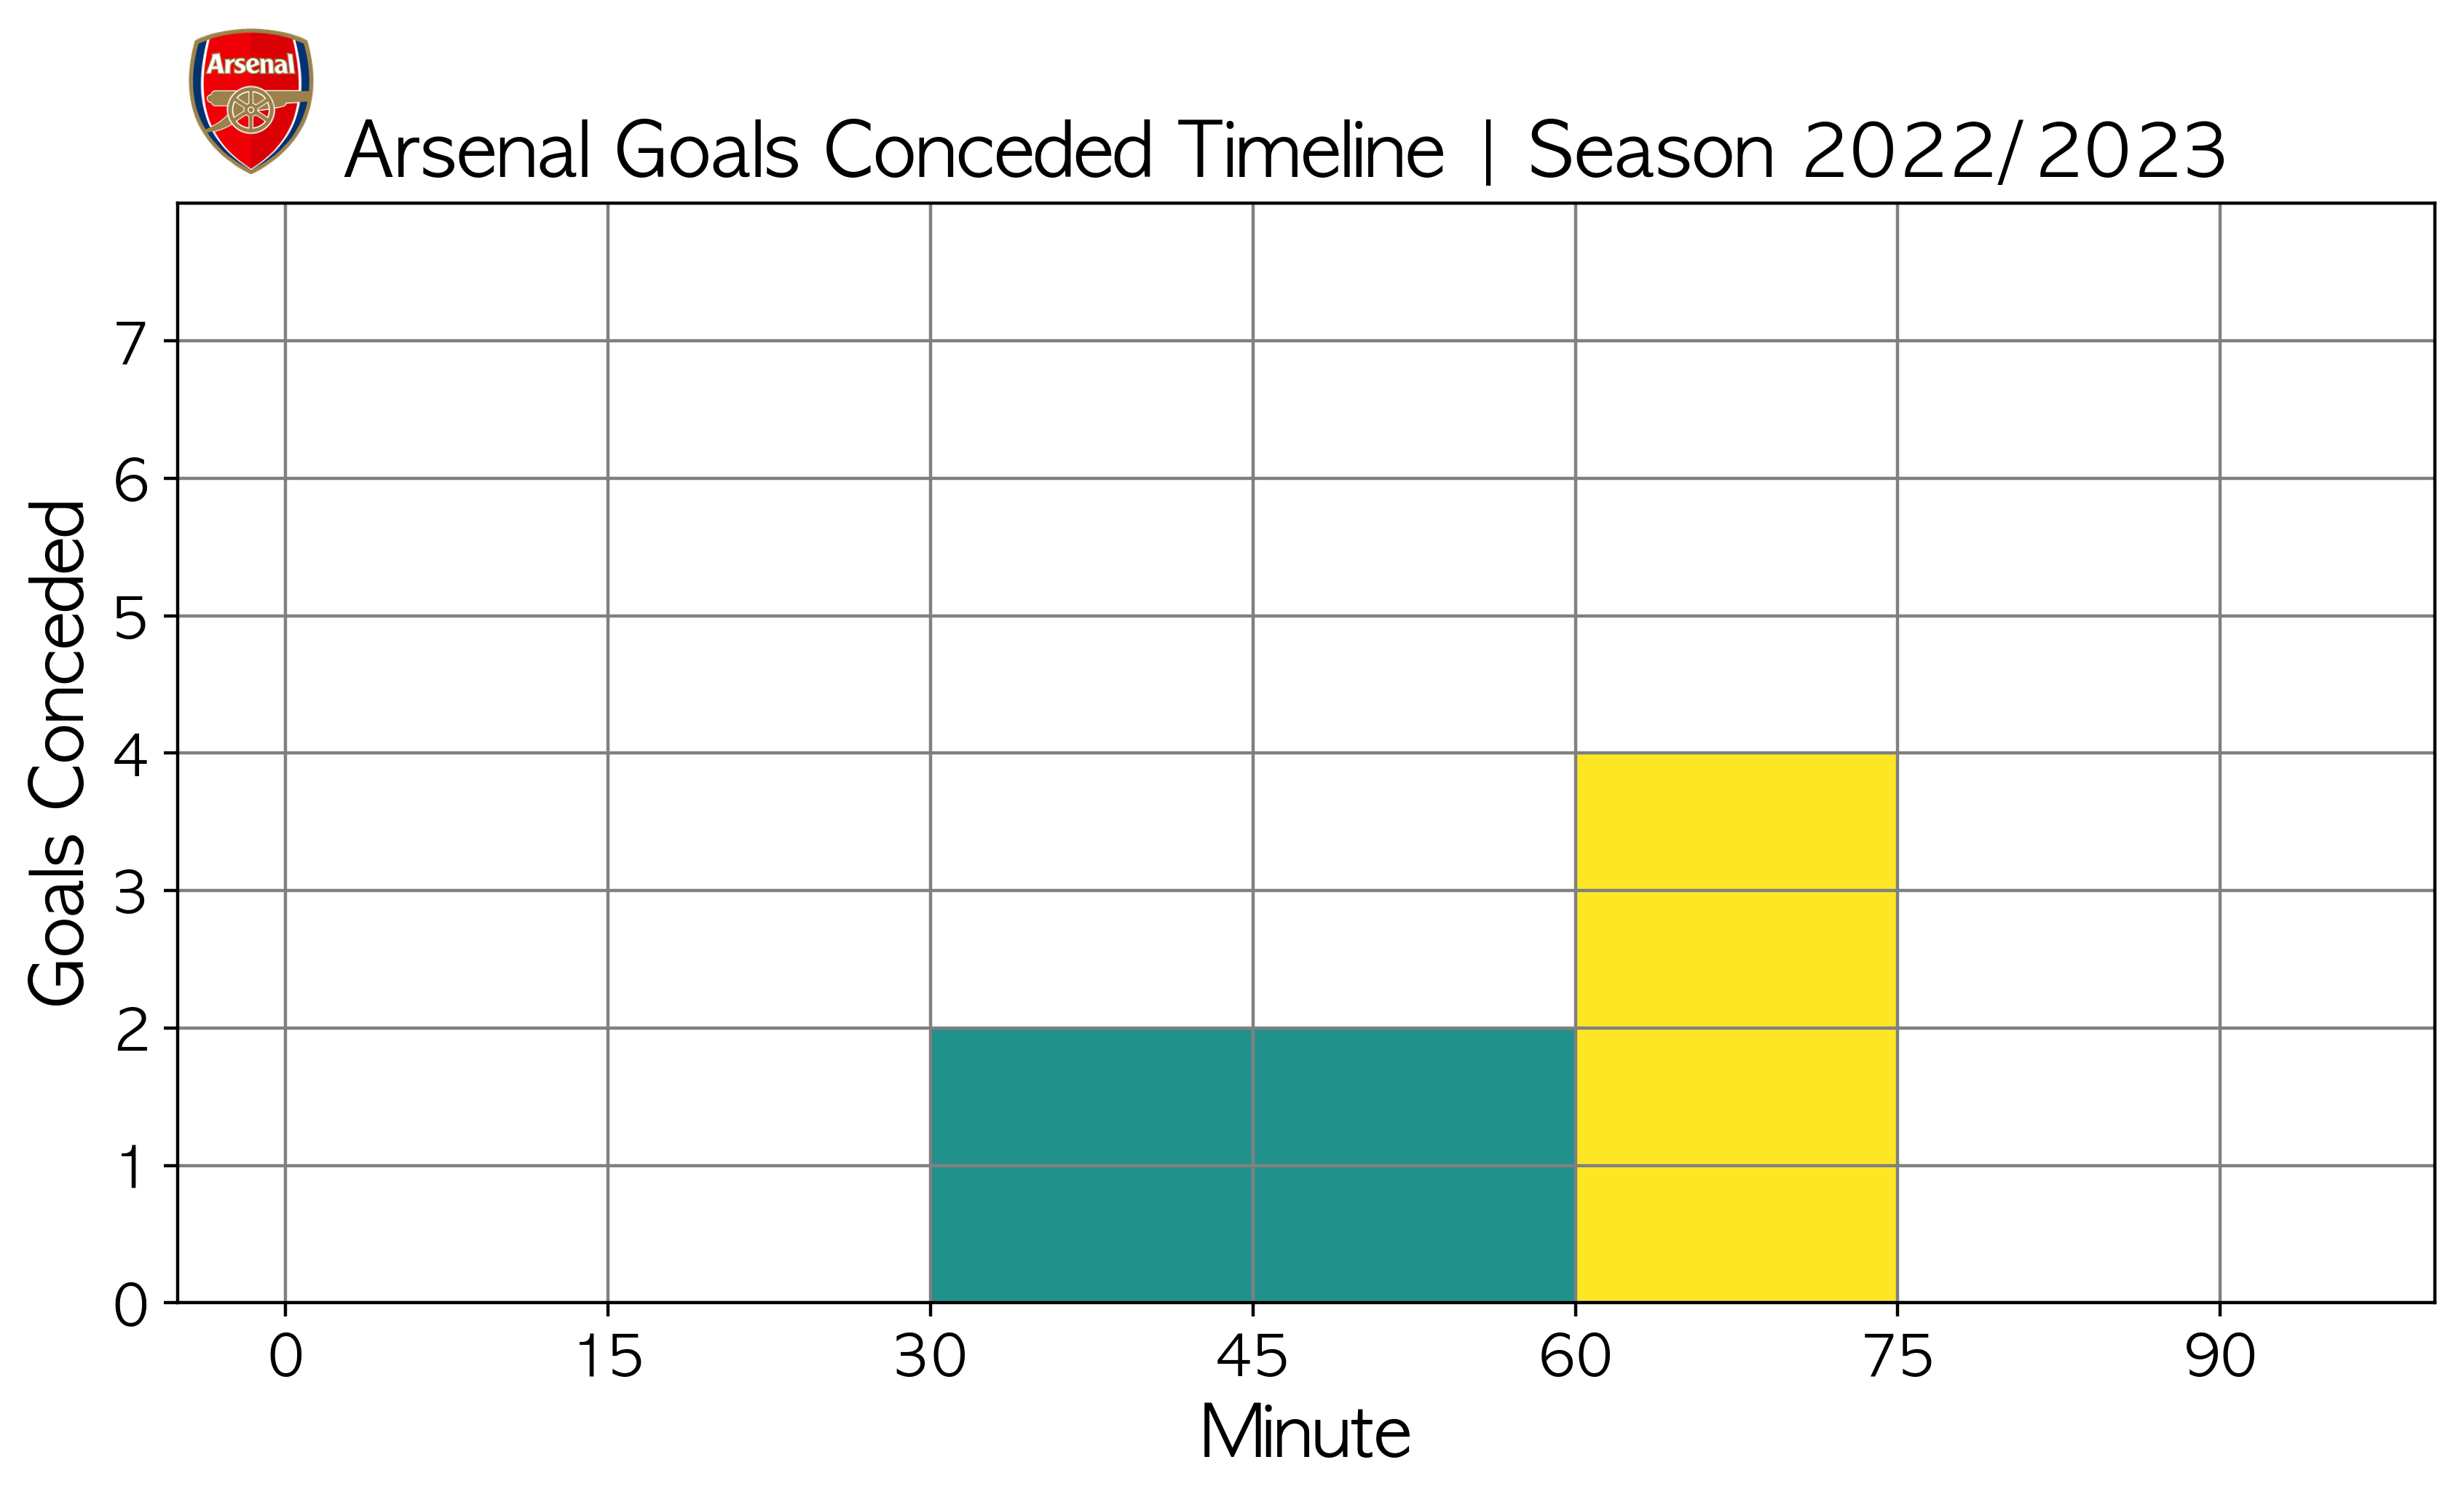

In [186]:
fig = plt.figure(figsize=(10,5), dpi=400)
ax = plt.subplot()


plt.ylim(0,8)
plt.xlim(-5,100)
ax.yaxis.set_ticks([y for y in range(0,8,1)])
ax.xaxis.set_ticks([x for x in range(0,105,15)])

plt.ylabel("Goals Scored",font ='AppleGothic',fontsize = 17)
plt.xlabel("Minute",font ='AppleGothic',fontsize = 17)
ax.tick_params(labelsize=14)

plt.yticks(fontname = "AppleGothic")
plt.xticks(fontname = "AppleGothic")

plt.grid(color='gray')

fig_text(
	x = 0.79, y = .89, 
    s = "Arsenal Goals Scored Timeline | Season 2022/2023",
	va = "bottom", ha = "right",
	font = "AppleGothic",size =18
)



team_id = 9825
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
logo_ax =fig.add_axes(
        [0.1,0.9,0.1,0.1],
         fc='None'
 )
logo_ax.imshow(club_icon)
logo_ax.axis('off')

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(goals_scored["minute"],bins= [0, 15,30,45,60,75, 90],color="red")

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
    
fig.savefig("AFC VS ARS.jpg")

#conceded timeline
fig = plt.figure(figsize=(10,5), dpi=400)
ax = plt.subplot()

plt.grid(color='gray')

plt.ylim(0,8)
plt.xlim(-5,100)
ax.yaxis.set_ticks([y for y in range(0,8,1)])
ax.xaxis.set_ticks([x for x in range(0,105,15)])

plt.ylabel("Goals Conceded",font ='AppleGothic',fontsize = 17)
plt.xlabel("Minute",font ='AppleGothic',fontsize = 17)
ax.tick_params(labelsize=14)

plt.yticks(fontname = "AppleGothic")
plt.xticks(fontname = "AppleGothic")


fig_text(
	x = 0.83, y = .89, 
    s = "Arsenal Goals Conceded Timeline | Season 2022/2023",
	va = "bottom", ha = "right",
	font = "AppleGothic",size =18
)



team_id = 9825
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
logo_ax =fig.add_axes(
        [0.1,0.9,0.1,0.1],
         fc='None'
 )
logo_ax.imshow(club_icon)
logo_ax.axis('off')

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(goals_conceded["minute"],bins= [0, 15,30,45,60,75, 90],color="red")

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
    